# Tatoeba: An exploratory data analysis (EDA) of Tatoeba and How to extract a subset of it

Author: Pierre Nugues

Tatoeba is a collection of sentences in many languages. They can be sentences in one language, for instance French, or translations, i.e. resulting in pairs of sentences in two languages, for instance French and English.

Tatoeba is a collaborative site and anyone can contribute and download the dataset here: https://tatoeba.org/downloads. As all the sentences are annotated with their language, many applications use Tatoeba to train machine-learning models. This includes translation and language detection.

Over the time, Tatoeba has become quite large. In this notebook, we will carry out a small exploratory data analysis of its content and see how we can extract a part of it.

In [1]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

## Reading the Dataset

In [2]:
FILE = '../../corpus/sentences.csv'

We create a generator

In [3]:
def file_reader(file):
    with open(file, encoding='utf8', errors='ignore') as f:
        for line in f:
            row = line.strip()
            yield tuple(row.split('\t'))

In [4]:
line_generator = file_reader(FILE)

We count the lines. Note that this can take time.

In [5]:
cnt = 0
for _ in line_generator:
    cnt += 1
cnt

10683616

We need to recreate `line_generator()` each time we run it.

In [6]:
cnt = 0
for _ in line_generator:
    cnt += 1
cnt

0

## Counting the Sentences per Language

For this, we recreate our generator

In [7]:
line_generator = file_reader(FILE)

And we count the sentences per language

In [8]:
lang_freqs = Counter(map(lambda x: x[1], line_generator))

In [9]:
lang_freqs.most_common(15)

[('eng', 1634173),
 ('rus', 937975),
 ('ita', 819414),
 ('tur', 719931),
 ('epo', 695530),
 ('ber', 610529),
 ('deu', 593757),
 ('kab', 534360),
 ('fra', 512459),
 ('por', 407042),
 ('spa', 379541),
 ('hun', 370095),
 ('jpn', 229427),
 ('heb', 199353),
 ('ukr', 180356)]

We plot them

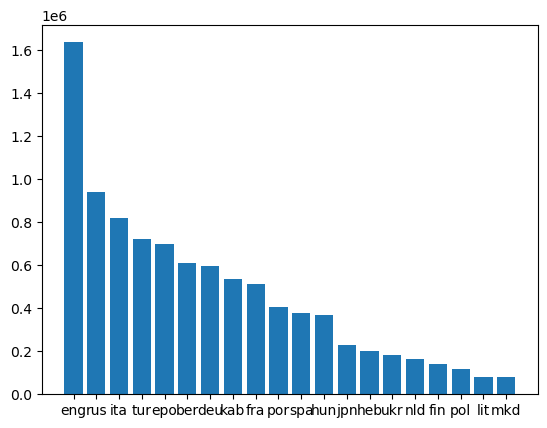

In [10]:
lang, cnt = zip(*lang_freqs.most_common(20))
x_pos = np.arange(len(lang))
plt.bar(x_pos, cnt)
plt.xticks(x_pos, lang)
plt.show()

## Selection of Sentences

We first write a generator that will return the sentence if it is less than a random number. We use a uniform random generator between 0 and 1. If we want to select 10% of the sentences of a given language, we will return the sentence when the random number is less than 0.1, for 20%, it will be 0.2, etc.

Given these stats

In [11]:
lang_freqs['eng'], lang_freqs['fra'], lang_freqs['swe']

(1634173, 512459, 49376)

we select 1% for English, 2% for French, and 20% for Swedish

In [12]:
lang_percentage = {'eng': 0.01, 'fra': 0.02, 'swe': 0.2}

In [13]:
def sentence_selector(file, lang_percentage):
    with open(file, encoding='utf8', errors='ignore') as f:
        for line in f:
            row = line.strip()
            lang_tuple = tuple(row.split('\t'))
            lang = lang_tuple[1]
            if lang in lang_percentage and np.random.uniform() < lang_percentage[lang]:                
                yield lang_tuple

In [14]:
sent_selector = sentence_selector(FILE, lang_percentage)

In [15]:
mini_corpus = list(sent_selector)

Its length should be manageable

In [16]:
len(mini_corpus)

36300

And it is more balanced

In [17]:
Counter(map(lambda x: x[1], mini_corpus))

Counter({'eng': 16359, 'fra': 10182, 'swe': 9759})

In [18]:
mini_corpus[:3]

[('1703', 'eng', 'I was trying to kill time.'),
 ('2114', 'eng', 'I spent the whole afternoon chatting with friends.'),
 ('2124', 'eng', 'You should have refused such an unfair proposal.')]

Finally, we store the file

In [19]:
with open('mini.tsv', encoding='utf8', mode='w', errors='ignore') as f:
    for sent in mini_corpus:
        f.write(sent[0] + '\t' + sent[1] + '\t' + sent[2] + '\n')